import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx
import math as math
import time
import pandas as pd


from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import Rectangle, Polygon
from plotly import graph_objects as go
from collections import Counter
from scipy.stats import norm
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding
from sklearn.feature_extraction.text import TfidfVectorizer #TfidfVectorizer - Transforms text to feature vectors that can be used as input to estimator.
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]
plt.rcParams['figure.dpi'] = 100

<ipython-input-1-56b4b97ab57a>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
df1 = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
df1.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df1.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2     Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                   NaN            NaN   
4     Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
...                                                 ...            ...   
8802  Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...  United States   
8803                                                NaN            NaN   
8804  Jesse Eisenberg, Woody Harrelson, Emma Stone, ...  United States   
8805  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...  United States   
8806  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...          India   

              date_added  release_year rating   duration  \
0     September 25, 2021          2020  PG-13     90 min   
1     September 24, 2021          2021  TV-MA  2 Seasons   
2     September 24, 2021          2021  TV-MA   1 Season   
3     September 24, 2021          2021  TV-MA   1 Season   
4     September 24, 2021          2021  TV-MA  2 Seasons   
...                  ...           ...    ...        ...   
8802   November 20, 2019          2007      R    158 min   
8803        July 1, 2019          2018  TV-Y7  2 Seasons   
8804    November 1, 2019          2009      R     88 min   
8805    January 11, 2020          2006     PG     88 min   
8806       March 2, 2019          2015  TV-14    111 min   

                                              listed_in  \
0                                         Documentaries   
1       International TV Shows, TV Dramas, TV Mysteries   
2     Crime TV Shows, International TV Shows, TV Act...   
3                                Docuseries, Reality TV   
4     International TV Shows, Romantic TV Shows, TV ...   
...                                                 ...   
8802                     Cult Movies, Dramas, Thrillers   
8803             Kids' TV, Korean TV Shows, TV Comedies   
8804                            Comedies, Horror Movies   
8805                 Children & Family Movies, Comedies   
8806     Dramas, International Movies, Music & Musicals   

                                            description  
0     As her father nears the end of his life, filmm...  
1     After crossing paths at a party, a Cape Town t...  
2     To protect his family from a powerful drug lor...  
3     Feuds, flirtations and toilet talk go down amo...  
4     In a city of coaching centers known to train I...  
...                                                 ...  
8802  A political cartoonist, a crime reporter and a...  
8803  While living alone in a spooky town, a young g...  
8804  Looking to survive in a world taken over by zo...  
8805  Dragged from civilian life, a former superhero...  
8806  A scrappy but poor boy worms his way into a ty...  

[8807 rows x 12 columns]>

WORDCLOUD

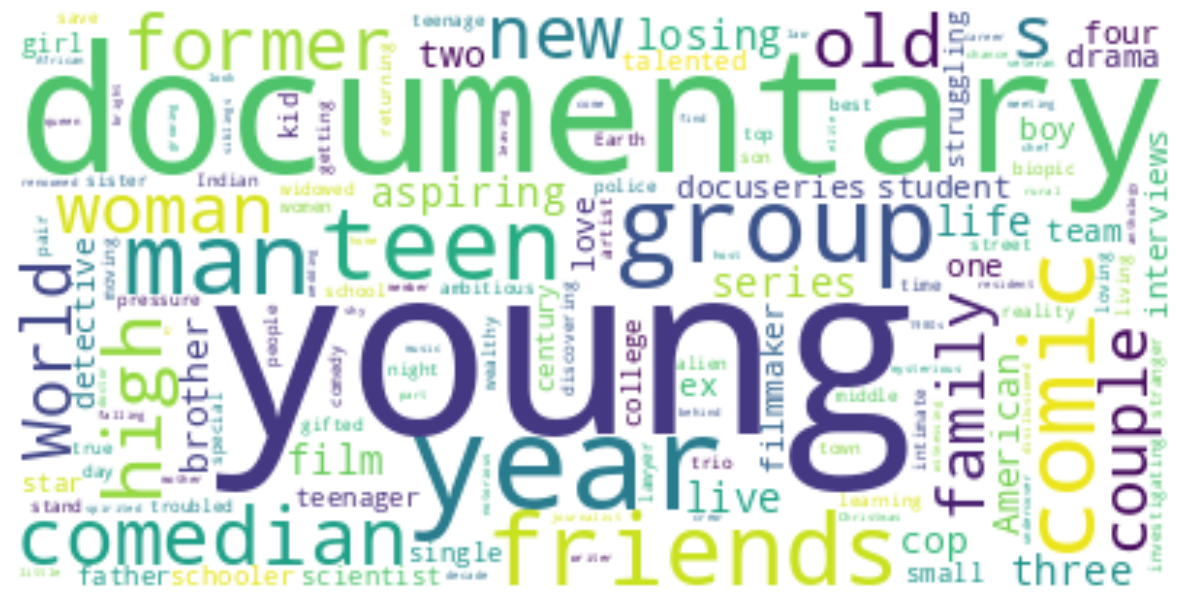

In [ ]:
text = " ".join(cat.split()[1] for cat in df1.description)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.figure(figsize=[15,15])
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

VISUALIZATION OF HIGH RATED CONTENTS ON THE GIVEN NETFLIX DATA

In [ ]:
ratings = pd.DataFrame({'Title':df1.title,
                    'Release Year':df1.release_year,
                    'Rating': df1.rating,
                    'Genre':df1.type})
ratings.drop_duplicates(subset=['Title','Release Year','Rating'], inplace=True)
ratings.shape


(8807, 4)

In [ ]:
joint_data=ratings.merge(df1,left_on='Title',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='Rating', ascending=False)

In [ ]:
country_count=joint_data['country'].value_counts().sort_values(ascending=False)
country_count=pd.DataFrame(country_count)
topcountries=country_count[0:11]
topcountries

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


FUNNEL CHART

In [ ]:
fig = go.Figure(go.Funnel(
    y = ["United States", "India", "United Kingdom", "Japan"],
    x = [2818,972,419,245],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["firebrick", "lightsalmon", "tan", "teal"],
    "line": {"width": [5, 5, 4,4,3,3], "color": ["wheat", "wheat", "blue", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show()

TREE MAP

In [ ]:
netflix_Turkey=df1[df1['country']=='Turkey']
nannef=netflix_Turkey.dropna()

fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','type'],color_continuous_scale='Purples')
fig.show()

COUNTPLOT

<ipython-input-16-cfa07f9d6e46>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




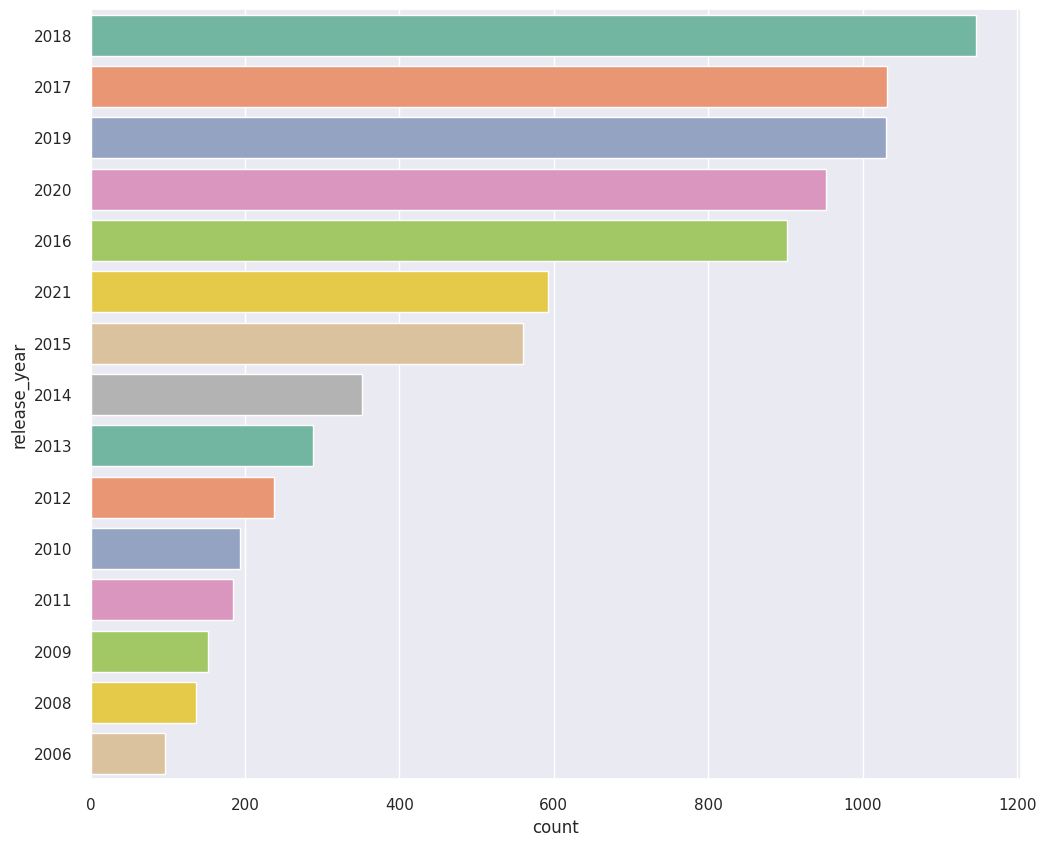

In [ ]:
#year wise analysis
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=df1, palette="Set2", order=df1['release_year'].value_counts().index[0:15])

LOLLIPOP PLOT OF GENRES vs THEIR COUNT ON THE GIVEN NETFLIX DATA

In [ ]:
genres=list(df1['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

<ipython-input-18-d5a5b96bf490>:13: UserWarning:

FixedFormatter should only be used together with FixedLocator



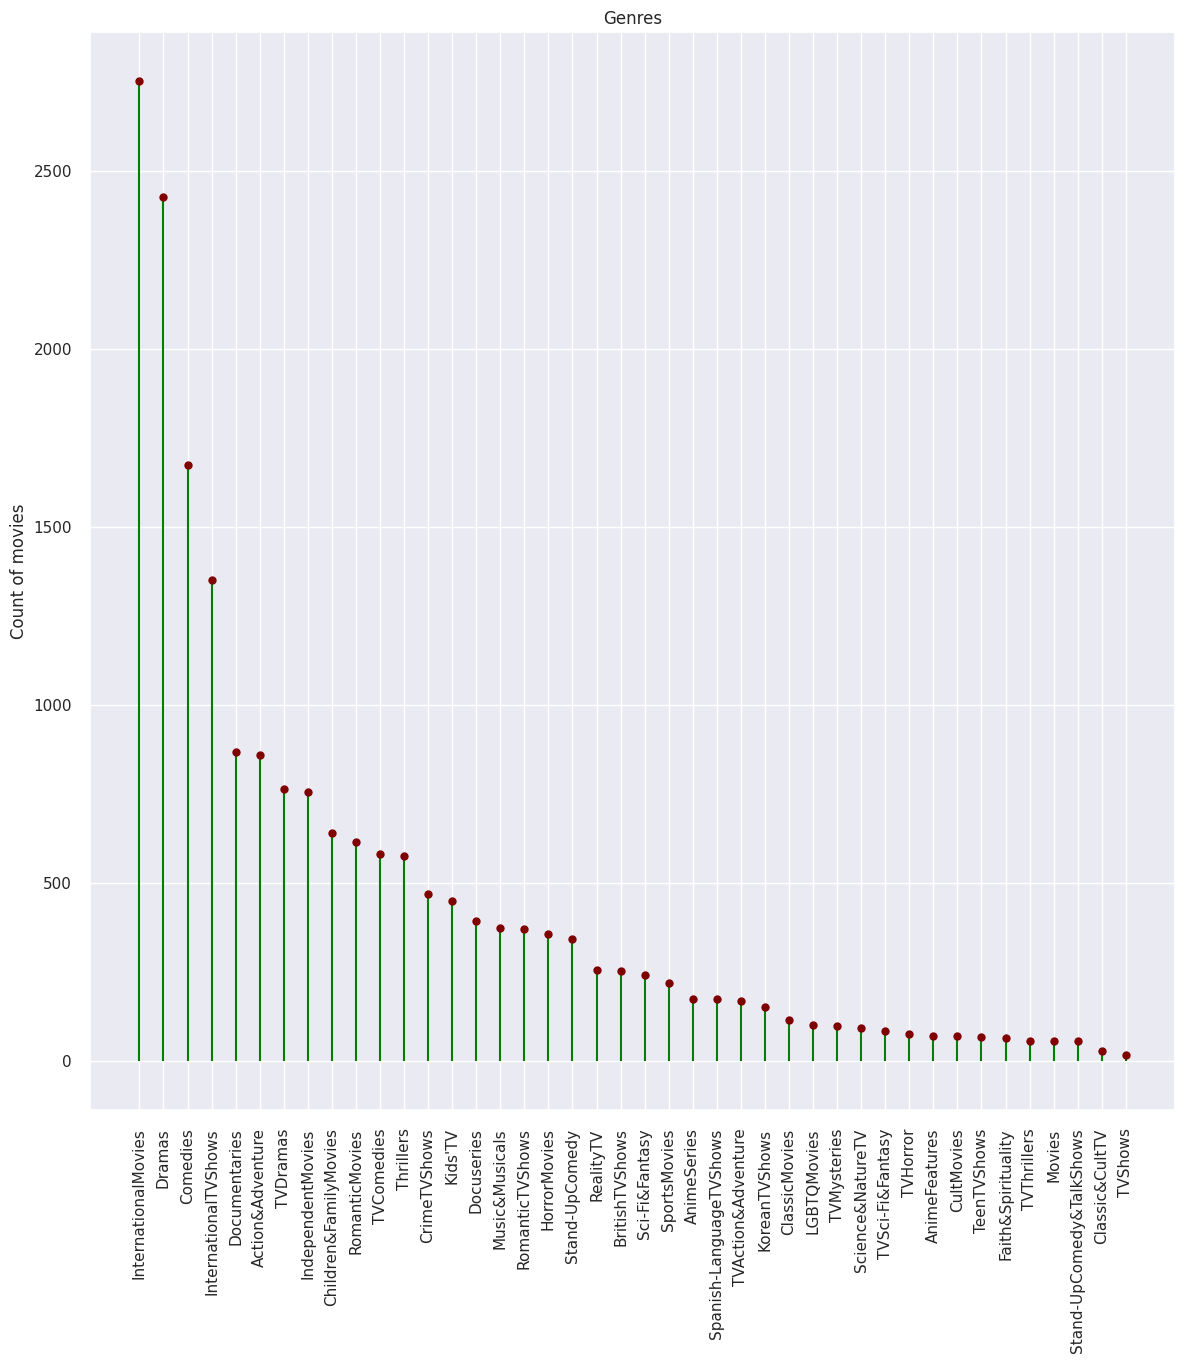

<Figure size 1500x1500 with 0 Axes>

In [ ]:
#Lollipop plot of Genres vs their count on Netflix

g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (15, 15))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
# set a title
ax.set_title("Genres");

<Axes: xlabel='rating'>

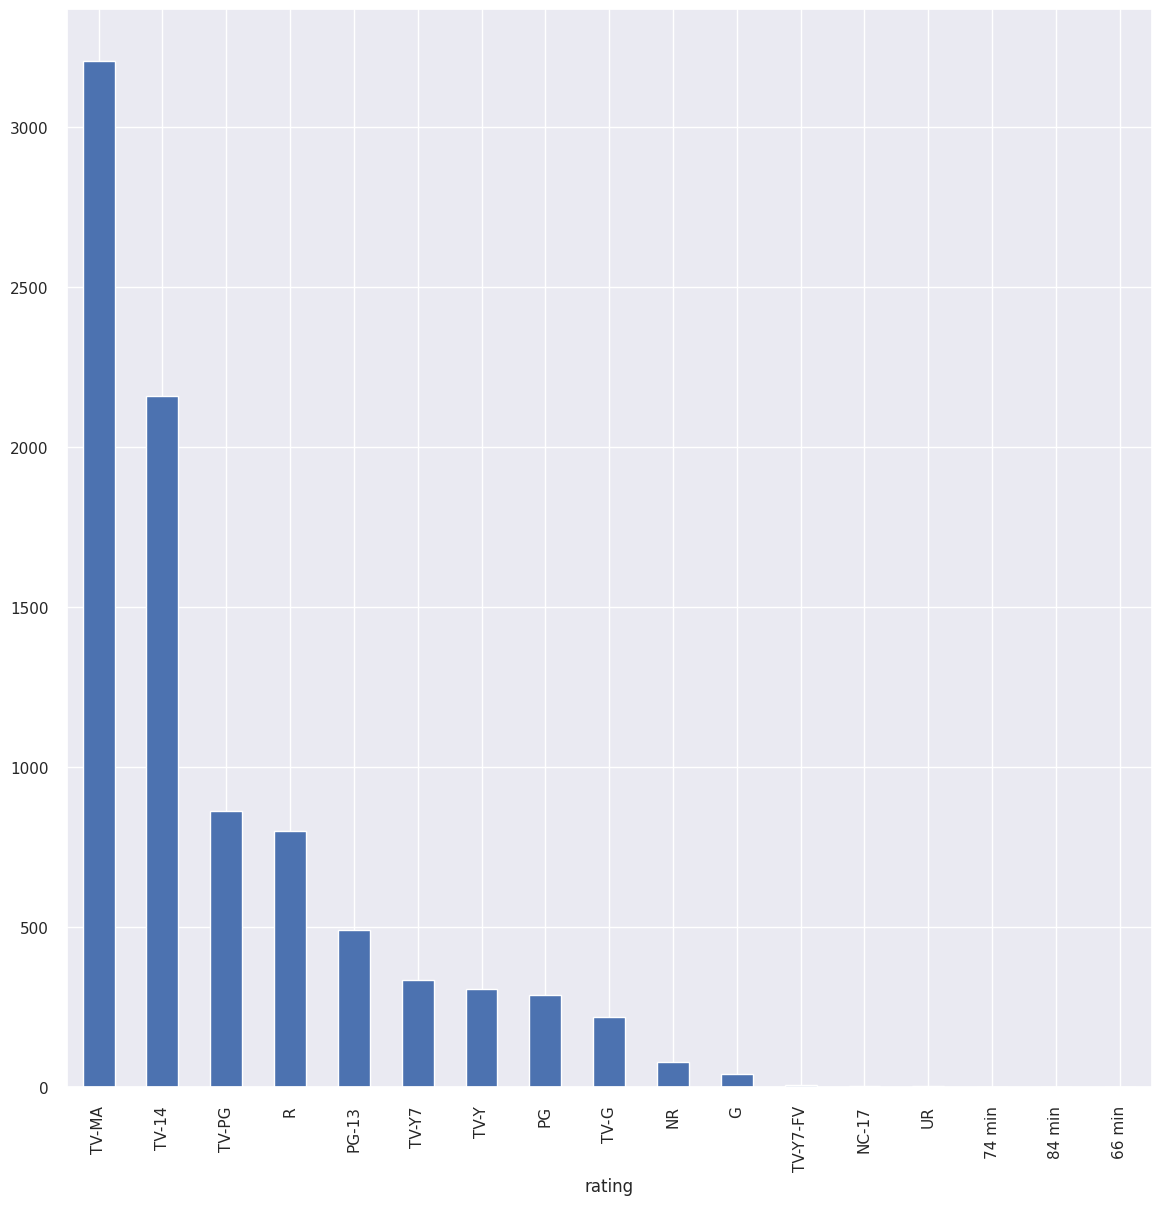

In [ ]:
#visualize the distribution of ratings for all titles
#matplotlib df1(x - ratings vs y-total)
allRatings = df1.rating.value_counts()
allRatings.plot(kind='bar')

TV SHOWS vs MOVIES WITH RESPECT TO THE GIVEN NETFLIX DATA

In [ ]:
colors = ['rgba(38, 24, 74, 0.8)', 'rgba(71, 58, 131, 0.8)',
        'rgba(122, 120, 168, 0.8)', 'rgba(164, 163, 204, 0.85)',
        'rgba(190, 192, 213, 1)']

fig = px.histogram(df1,
                   y="type",
                   orientation='h',
                   width=600,
                   height=350,
                   histnorm='percent',
                   template="plotly_dark"
                   )
fig.update_layout(title="<b>Netflix Content: TV Show vs Movies<b>",
                  font_family="San Serif",
                  bargap=0.2,
                  barmode='group',
                  titlefont={'size': 28},
                  paper_bgcolor='lightgray',
                  plot_bgcolor='lightgray',
                  legend=dict(
                  orientation="v",
                      y=1,
                      yanchor="top",
                      x=1.250,
                      xanchor="right",)
                  )
annotations = []
annotations.append(dict(xref='paper', yref='paper',
                        x=0.0, y=1.2,
                        text='Netflix mostly produce Movies over TV shows.',
                             font=dict(family='Arial', size=16, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=0.49, y=0.85,
                        text='30.4%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))
annotations.append(dict(xref='paper', yref='paper',
                        x=1.09, y=0.19,
                        text='69.6%',
                             font=dict(family='Arial', size=20, color=colors[2]),
                        showarrow=False))

fig.update_layout(
    autosize=False,
    width=600,
    height=350,
    margin=dict(
        l=50,
        r=50,
        b=50,
        t=120,
    ),
)

fig.update_layout(annotations=annotations)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [ ]:
df_tv = df1[df1["type"] == "TV Show"]
df_movies = df1[df1["type"] == "Movie"]

TOP MOVIE & TV SHOW RATINGS BASED ON RATING SYSTEM

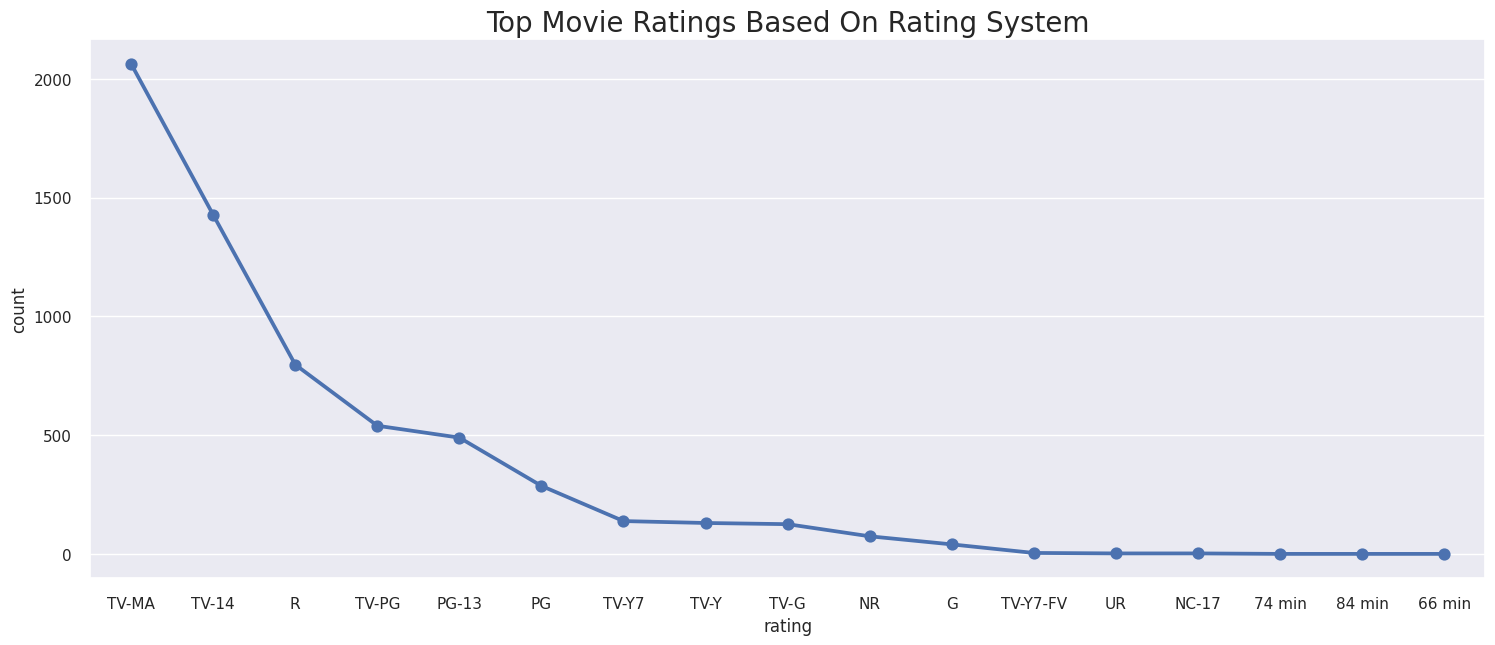

In [ ]:
movie_ratings = df_movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System',size='20')
plt.show()

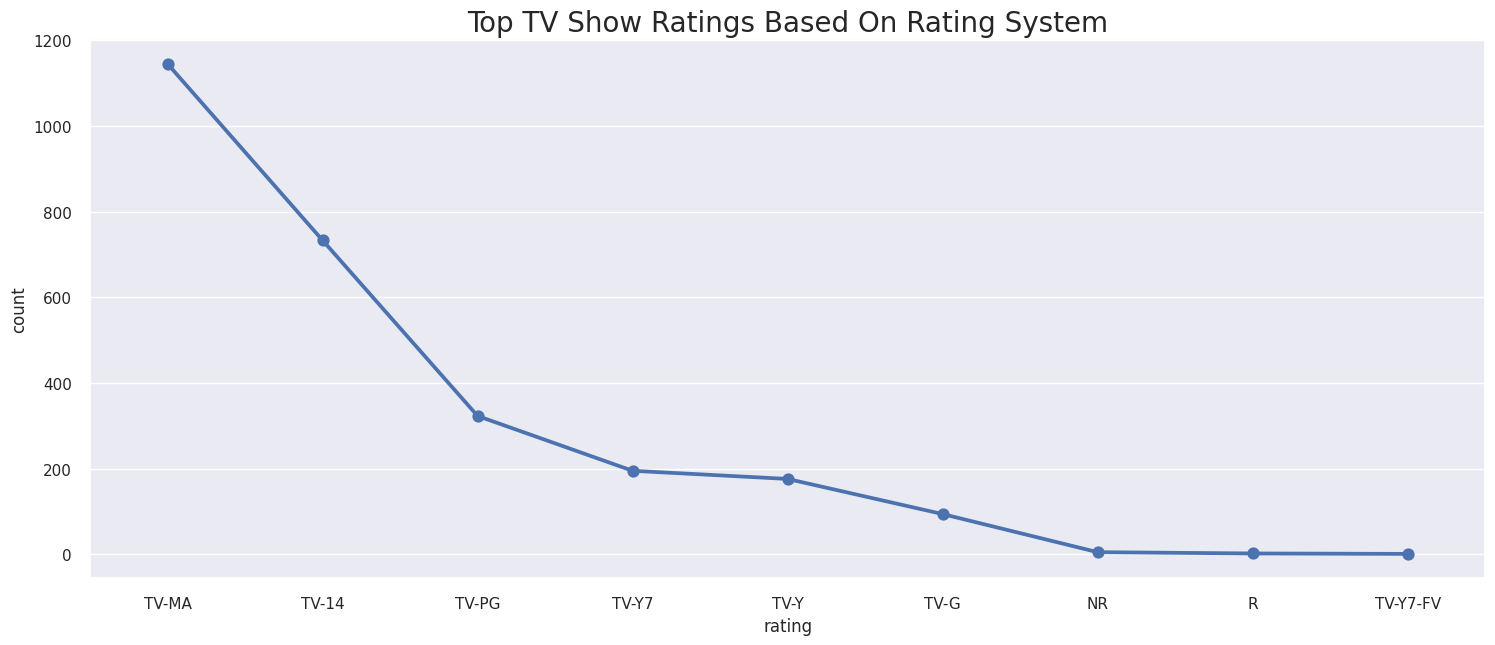

In [ ]:
tv_ratings = df_tv.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

DISTRIBUTION OF MOVIE & TV SHOW RATING ACCORDING TO AGE GROUPS

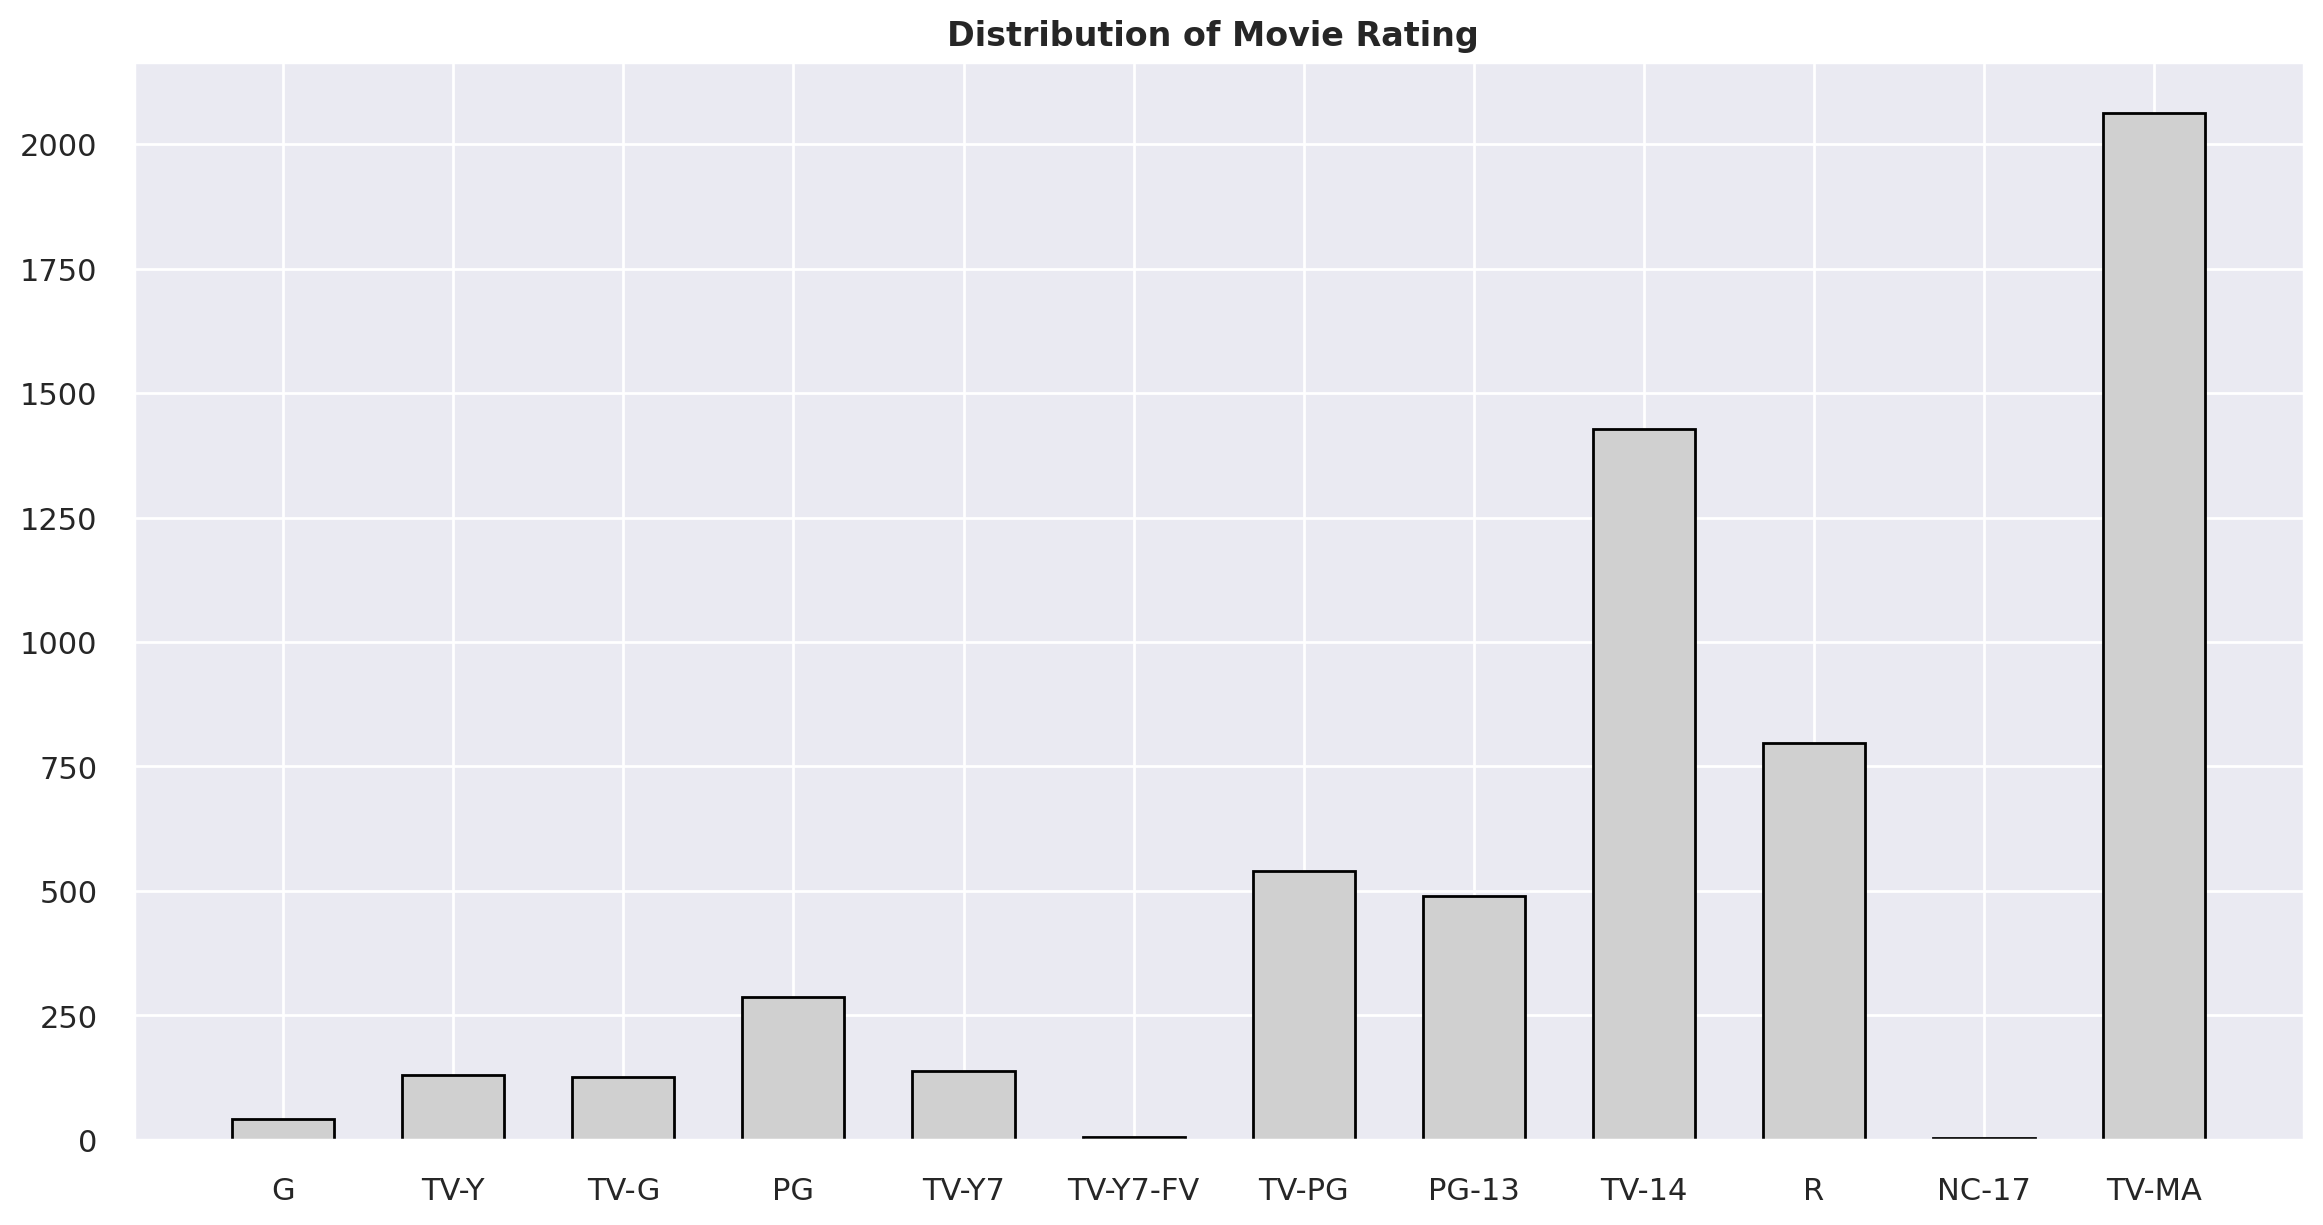

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]



fig, ax = plt.subplots(1, 1, figsize=(14, 7), dpi=200)
ax.bar(movie_rating.index, movie_rating,  color="#d0d0d0", width=0.6, edgecolor='black')
ax.set_title(f'Distribution of Movie Rating ', fontweight='bold')
plt.show()


In [ ]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df1['target_ages'] = df1['rating'].replace(ratings_ages)
df1['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', '74 min', '84 min',
       '66 min', nan], dtype=object)

In [ ]:
def generate_rating_df(df1):
    rating_df = df1.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [ ]:
rating_df = generate_rating_df(df1)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages', title='Ratings of Movies And TV Shows Based On Target Age Groups',  labels={'counts':'COUNT', 'rating':'RATINGS', 'target_ages':'TARGET AGE GROUPS' })
fig.show()

In [ ]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

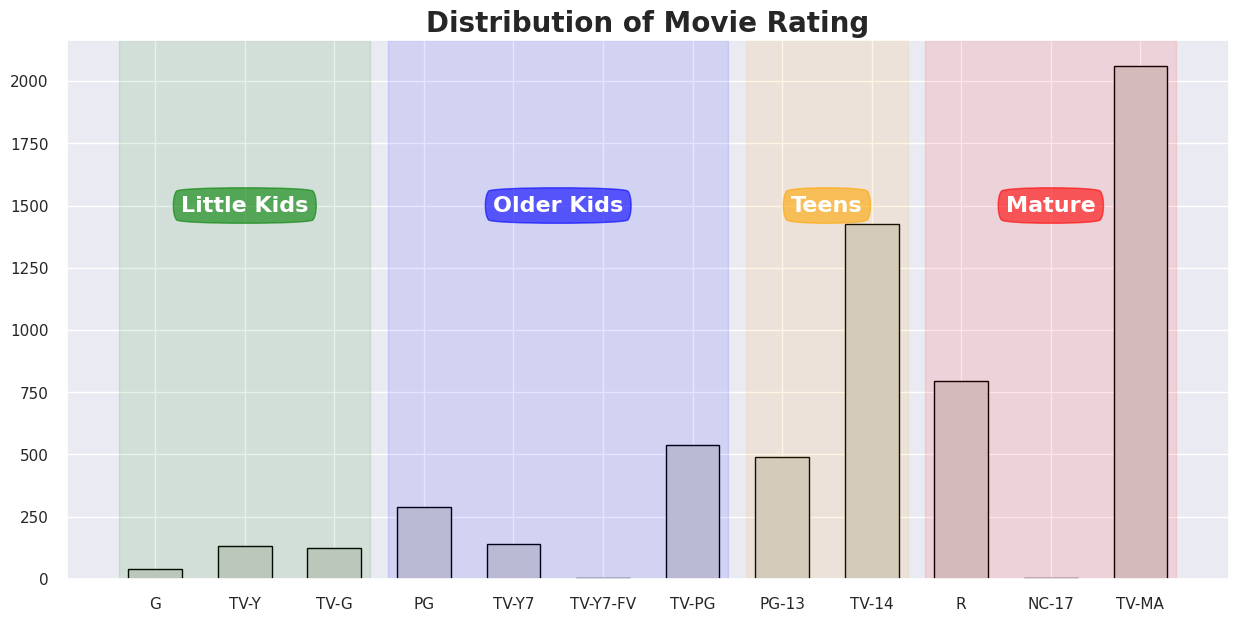

In [ ]:
rating_barplot(movie_rating,'Movie', 1500)

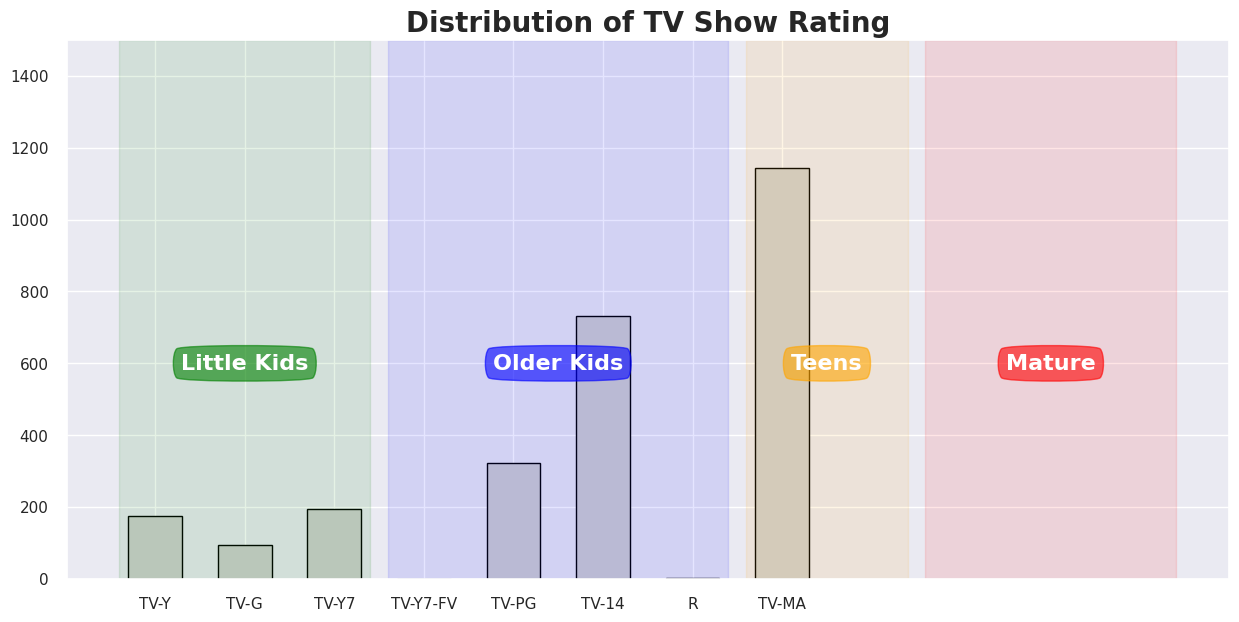

In [ ]:
rating_barplot(tv_rating,'TV Show' , 600, 1500)

RELATIONSHIP BETWEEN EACH GENRE BY MOVIE & TV SHOW

In [ ]:
# preprocessing
sns.set_style('whitegrid') # plot with grid

movie = df1[df1['type'] == 'Movie']
tv_show = df1[df1['type'] == 'TV Show']

rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
movie_rating = movie['rating'].value_counts()[rating_order]

In [ ]:
def relation_heatmap(df1, title):
    df1['genre'] = df1['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
    Types = []
    for i in df1['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")
    test = df1['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})

    plt.show()

ANALYSIS ON DURATION FOR MOVIES & TV SHOWS

<ipython-input-40-fad0d2f07670>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




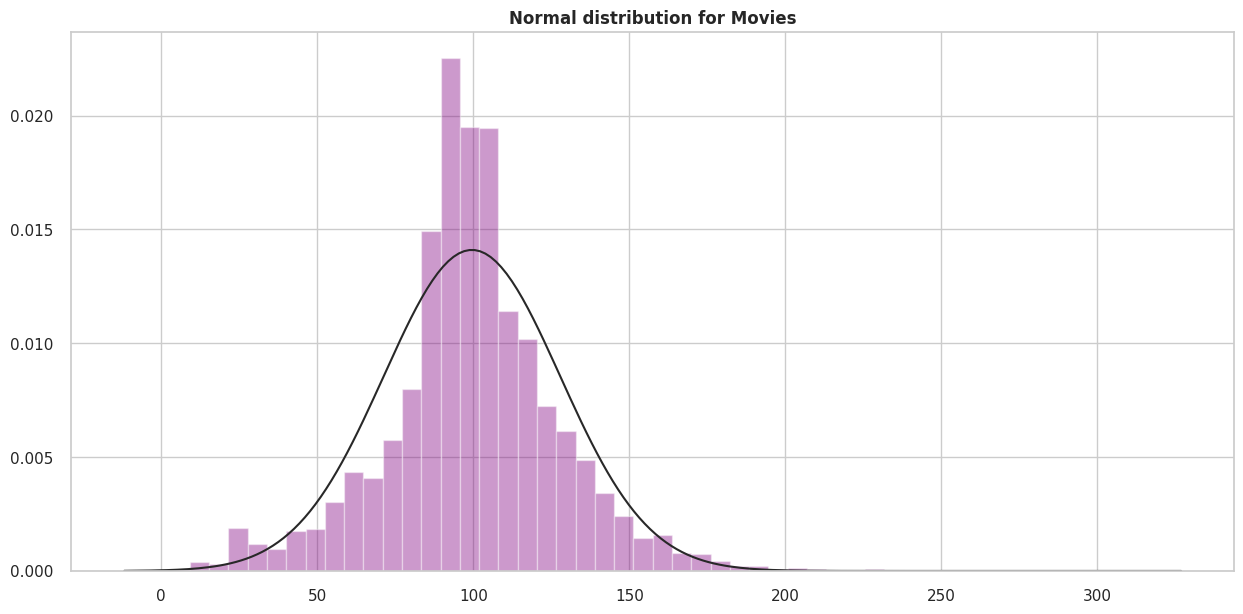

In [ ]:
plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['Purple'])
plt.title('Normal distribution for Movies',fontweight="bold")
plt.show()


In [ ]:
fig = px.histogram(x=df_tv['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of TV Shows duration",
    xaxis_title="Duration of TV ShowS",
)
fig.show()

In [ ]:
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]

In [ ]:


df1['directors'] = df1['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['categories'] = df1['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['actors'] = df1['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df1['countries'] = df1['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])


In [ ]:
# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df1['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

In [ ]:
# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]


request_transform = vector.transform(df1['description'])
# new column cluster based on the description
df1['cluster'] = kmeans.predict(request_transform)

df1['cluster'].value_counts().head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1934: FutureWarning:

The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,count
cluster,
35,8186
108,326
112,100
142,2
131,2


In [ ]:
P = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df1.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    P.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
    P.add_node(rowi['cluster'],label="CLUSTER")
    P.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        P.add_node(element,label="CAT")
        P.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        P.add_node(element,label="PERSON")
        P.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        P.add_node(element,label="COU")
        P.add_edge(rowi['title'], element, label="COU_IN")


    snode="Sim("+rowi['title'][:15].strip()+")"
    P.add_node(snode,label="SIMILAR")
    P.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        P.add_edge(snode, df1['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time))

 iter 0 -- 0.006402730941772461 seconds --
 iter 1000 -- 0.6928365230560303 seconds --
 iter 2000 -- 1.3342654705047607 seconds --
 iter 3000 -- 1.9869072437286377 seconds --
 iter 4000 -- 3.0422003269195557 seconds --
 iter 5000 -- 3.439624071121216 seconds --
 iter 6000 -- 4.178478479385376 seconds --
 iter 7000 -- 4.964057683944702 seconds --
 iter 8000 -- 5.642525911331177 seconds --
 finish -- 6.1984288692474365 seconds --


In [ ]:
def get_recommendation(root):
    commons_dict = {}
    for h in P.neighbors(root):
        for h2 in P.neighbors(h):
            if h2==root:
                continue
            if P.nodes[h2]['label']=="MOVIE":
                commons = commons_dict.get(h2)
                if commons==None:
                    commons_dict.update({h2 : [h]})
                else:
                    commons.append(h)
                    commons_dict.update({h2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for h in values:
            w=w+1/math.log(P.degree(h))
        movies.append(key)
        weight.append(w)

    final = pd.Series(data=np.array(weight),index=movies)
    final.sort_values(inplace=True,ascending=False)
    return final;

In [ ]:
final1 = get_recommendation("PK")
final2 = get_recommendation("Ocean's Thirteen")
final3 = get_recommendation("The Devil Inside")
final4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'PK\n"+"*"*40)
print(final1.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(final2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(final3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(final4.head())

****************************************
 Recommendation for 'PK
****************************************
3 Idiots           2.107430
Sanju              1.723025
Drive              1.594728
Chance Pe Dance    1.554329
Boss               1.428067
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve                    5.205671
Brooklyn's Finest                 1.560010
The Informant!                    1.342598
Fear and Loathing in Las Vegas    1.277694
American Outlaws                  1.102107
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Boy                  2.002853
Lying and Stealing       1.832719
Ink Master               0.790849
Zumbo's Just Desserts    0.669096
Fit for Fashion          0.669096
dtype: float64
****************************************
 Recommendation for 'Stranger Things'
***********

In [ ]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for q in list_in:
        sub_graph.add(q)
        for h in P.neighbors(q):
                sub_graph.add(h)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = P.subgraph(sub_graph)
    colors=[]
    for h in subgraph.nodes():
        if P.nodes[h]['label']=="MOVIE":
            colors.append('blue')
        elif P.nodes[h]['label']=="PERSON":
            colors.append('red')
        elif P.nodes[h]['label']=="CAT":
            colors.append('green')
        elif P.nodes[h]['label']=="COU":
            colors.append('yellow')
        elif P.nodes[h]['label']=="SIMILAR":
            colors.append('orange')
        elif P.nodes[h]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()


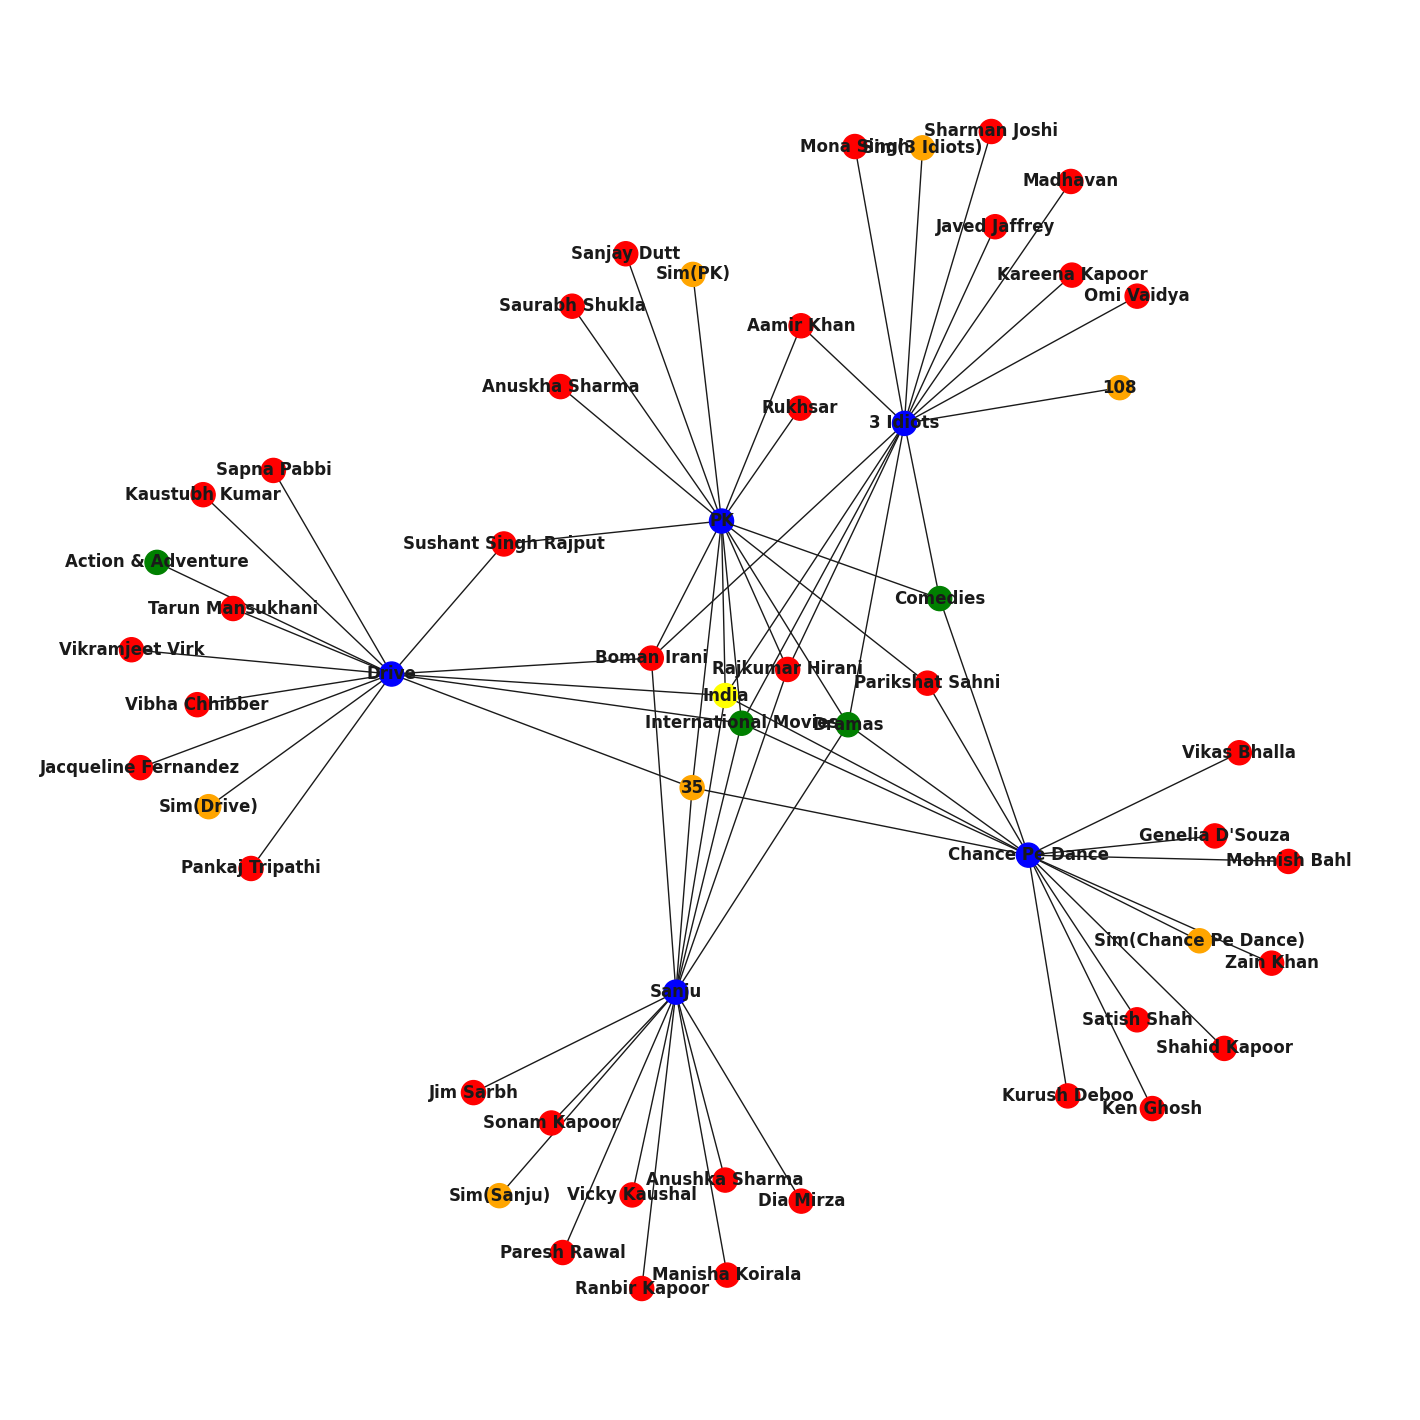

In [ ]:
#visualizing the recommendation for "PK"

reco=list(final1.index[:4].values)
reco.extend(["PK"])
sub_graph = get_all_adj_nodes(reco)
draw_sub_graph(sub_graph)